# Criando os Nomes

In [16]:
import pandas as pd

In [29]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
len(nomes_f)

20

In [6]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [7]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
8,PATRICIA,0,529446,9,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
19,MARIANA,0,381778,20,F
0,MARIA,0,11694738,1,F


In [8]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
13,DANIEL,0,706527,14,M
19,RODRIGO,0,598825,20,M
12,RAFAEL,0,814709,13,M
11,GABRIEL,0,922744,12,M
2,ANTONIO,0,2567494,3,M


In [33]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 40


In [34]:
frames = [nomes_f, nomes_m]

In [35]:
nomes = pd.concat(frames)['nome'].to_frame()
len(nomes)

40

In [37]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
5,JULIANA
6,MARCIA
7,FERNANDA
8,PATRICIA
9,ALINE


# Incluindo ID dos alunos

In [38]:
import numpy as np
np.random.seed(123)

In [39]:
total_alunos = len(nomes)
total_alunos

40

In [41]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [42]:
nomes.sample(10)

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26
11,GABRIEL,37
8,LUIZ,10
9,MARCOS,16
9,ALINE,21
17,FELIPE,35
12,RAFAEL,33
1,ANA,11


In [44]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [47]:
nomes.sample(5)

,nome,id_aluno,dominio
1,JOAO,5,@servicodoemail.com
0,MARIA,7,@dominiodoemail.com.br
4,ADRIANA,6,@servicodoemail.com
15,BRUNO,20,@servicodoemail.com
2,FRANCISCA,13,@servicodoemail.com


In [48]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [49]:
nomes.sample(5)

,nome,id_aluno,dominio,email
6,MARCIA,24,@servicodoemail.com,marcia@servicodoemail.com
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com
7,FERNANDA,2,@servicodoemail.com,fernanda@servicodoemail.com
12,RAFAEL,33,@dominiodoemail.com.br,rafael@dominiodoemail.com.br
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br


# Criando a tabela de cursos

In [50]:
!pip3 install html5lib
!pip3 install lxml

In [51]:
import html5lib

In [53]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = (pd.read_html(url))

In [54]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [55]:
type(cursos)

list

In [57]:
cursos = cursos[0]

In [58]:
type(cursos)

pandas.core.frame.DataFrame

In [60]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index 'nome do curso'

In [63]:
cursos = cursos.rename(columns = {'Nome do curso': 'nome_do_curso'})

In [64]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [65]:
cursos['id'] = cursos.index + 1

In [66]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [69]:
cursos = cursos.set_index('id')

In [70]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [71]:
nomes.sample(5)

,nome,id_aluno,dominio,email
14,JESSICA,19,@servicodoemail.com,jessica@servicodoemail.com
0,JOSE,26,@dominiodoemail.com.br,jose@dominiodoemail.com.br
0,MARIA,7,@dominiodoemail.com.br,maria@dominiodoemail.com.br
19,RODRIGO,3,@dominiodoemail.com.br,rodrigo@dominiodoemail.com.br
11,CAMILA,38,@servicodoemail.com,camila@servicodoemail.com


In [82]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [83]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
7,LUCAS,1,@servicodoemail.com,lucas@servicodoemail.com,1
2,ANTONIO,27,@servicodoemail.com,antonio@servicodoemail.com,1
4,ADRIANA,6,@servicodoemail.com,adriana@servicodoemail.com,1
19,MARIANA,17,@servicodoemail.com,mariana@servicodoemail.com,1
5,PAULO,28,@dominiodoemail.com.br,paulo@dominiodoemail.com.br,2


In [84]:
nomes.matriculas.describe()

count    40.00000
mean      1.82500
std       1.19588
min       1.00000
25%       1.00000
50%       1.00000
75%       2.00000
max       5.00000
Name: matriculas, dtype: float64

In [86]:
!pip3 install seaborn
import seaborn as sns

     ------------------------------------ 292.8/292.8 kB 861.5 kB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 4.4 MB/s eta 0:00:00


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

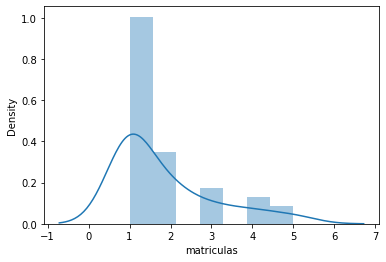

In [93]:
sns.distplot(nomes.matriculas)

In [94]:
nomes.matriculas.value_counts()

1    23
2     8
3     4
4     3
5     2
Name: matriculas, dtype: int64

# Selecionando cursos

In [95]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
18,RAIMUNDO,29,@servicodoemail.com,raimundo@servicodoemail.com,2
0,JOSE,26,@dominiodoemail.com.br,jose@dominiodoemail.com.br,2
1,JOAO,5,@servicodoemail.com,joao@servicodoemail.com,5
8,LUIZ,10,@servicodoemail.com,luiz@servicodoemail.com,1
9,ALINE,21,@servicodoemail.com,aline@servicodoemail.com,4


In [98]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [102]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

        
    matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [103]:
matriculas.head(10)

,id_aluno,id_curso
0,7,13
1,11,5
2,13,12
3,39,16
4,39,3
5,39,17
6,39,4
7,39,12
8,6,9
9,12,6


In [107]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,6,Java para Web
3,5,C# para Web
4,2,Ruby on Rails
5,3,Cursos de Python
6,2,PHP com MySql
8,3,Novas integrações com Java
9,3,TDD com Java
10,8,Código limpo com C#
11,1,Preparatório para certificação Java


In [108]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
7,FERNANDA,2,@servicodoemail.com,fernanda@servicodoemail.com,1
5,JULIANA,12,@servicodoemail.com,juliana@servicodoemail.com,2
16,EDUARDO,18,@dominiodoemail.com.br,eduardo@dominiodoemail.com.br,2


In [109]:
cursos.head(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web


In [110]:
matriculas.head(3)

,id_aluno,id_curso
0,7,13
1,11,5
2,13,12


In [111]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,6,Java para Web
3,5,C# para Web
4,2,Ruby on Rails


# Saída em diferentes formatos

In [112]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,6,Java para Web
3,5,C# para Web
4,2,Ruby on Rails


In [113]:
matriculas_por_curso.to_csv('Matriculas_por_curso.csv', index = False)

In [116]:
matriculas_json = matriculas_por_curso.to_json()

In [117]:
matriculas_json

'{"quantidade_de_alunos":{"2":6,"3":5,"4":2,"5":3,"6":2,"8":3,"9":3,"10":8,"11":1,"12":8,"13":2,"14":5,"15":3,"16":7,"17":4,"18":1,"19":4,"20":6},"nome_do_curso":{"2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [118]:
matriculas_html = matriculas_por_curso.to_html()

In [120]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>6</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>5</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>2</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>3</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>8</td>
      <td>Código limpo com C#</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1</td>
      <td>